<a href="https://colab.research.google.com/github/dhiyaul10/PCVK_Ganjil_2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


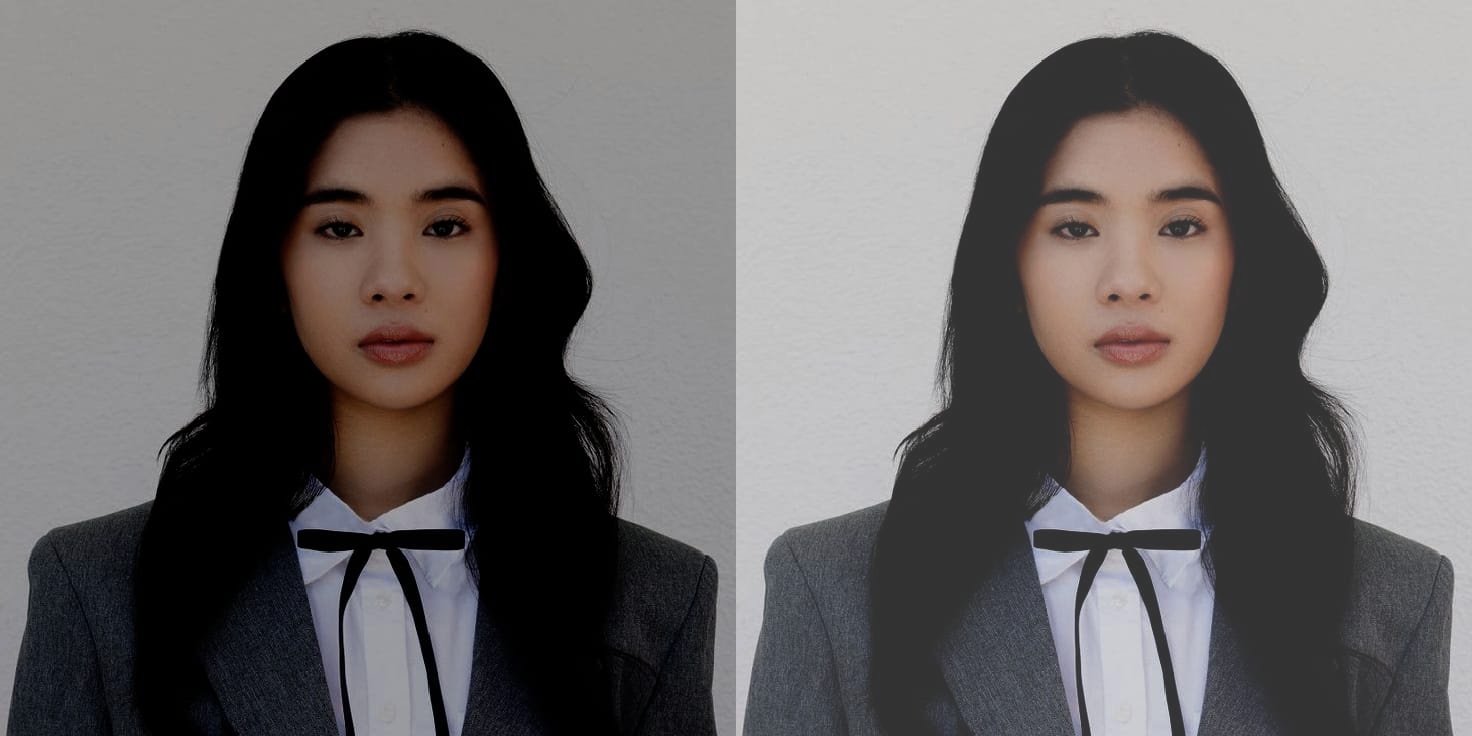

In [14]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

# Baca citra
original = cv.imread('/content/drive/MyDrive/Image PCVK/female.jpeg')

# Cara manual dengan perulangan
brightness_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# brightness_image = cv.convertScaleAbs(original, beta=brightness)

# Tampilkan hasil
final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

# **TUGAS**

1. Terapkan invers gambar dalam kode Anda menggunakan rumus yang ditunjukkan pada sub bagian latar belakang teoritis
di atas, yang menghasilkan output seperti yang ditunjukkan pada gambar berikut:

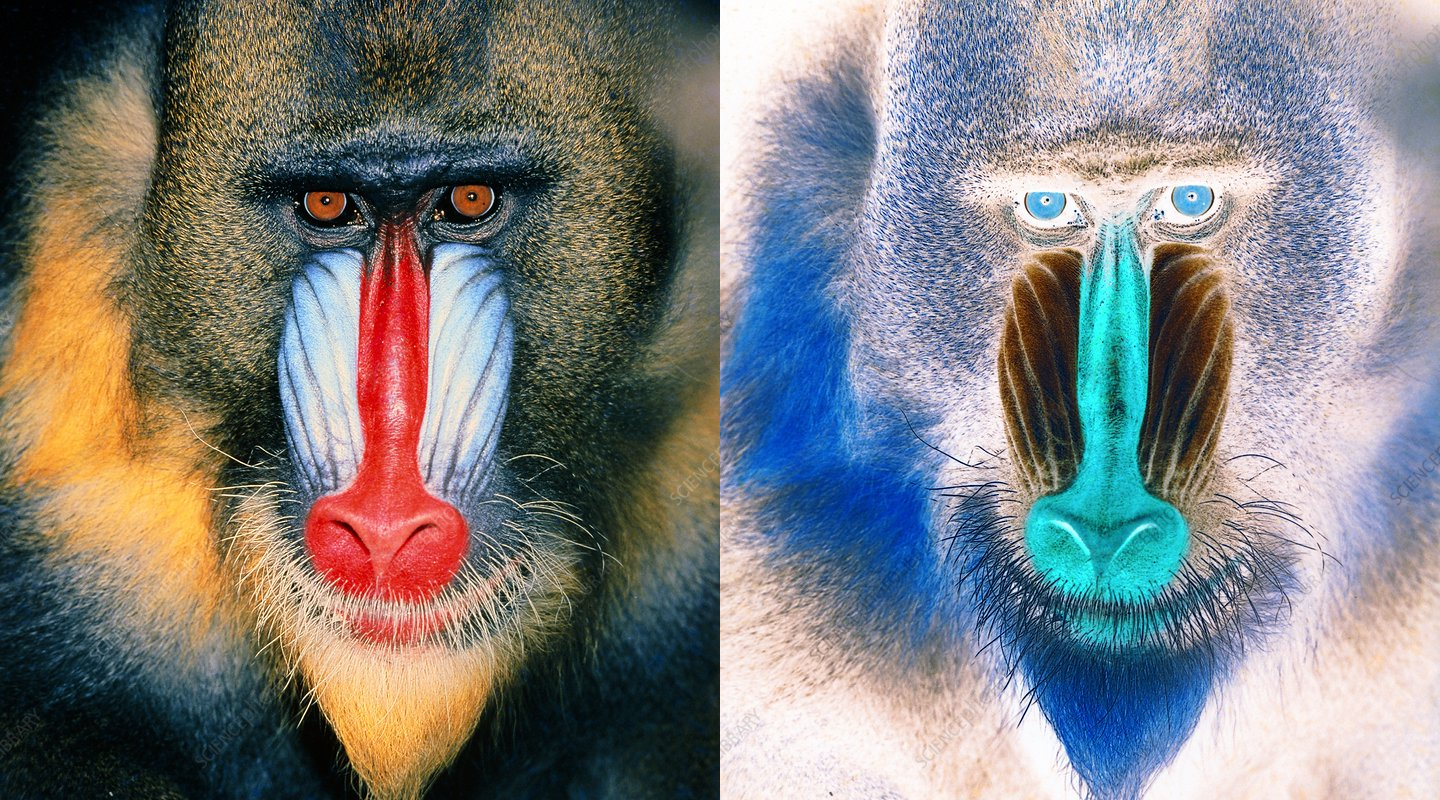

In [17]:
# Load image
image = cv.imread('/content/drive/MyDrive/Image PCVK/Mandrill.jpg')

# Menerapkan inversi gambar menggunakan rumus 255 - pixel_value
inverted_image = 255 - image

# Menampilkan gambar asli dan terbalik
final_frame_inversion = cv.hconcat([image, inverted_image])
cv2_imshow(final_frame_inversion)

2. Implementasikan transformasi kontras di Google Collaboratory menggunakan rumus yang tertulis
di bagian Latar Belakang Teoritis, yang menghasilkan output seperti yang ditunjukkan pada gambar berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


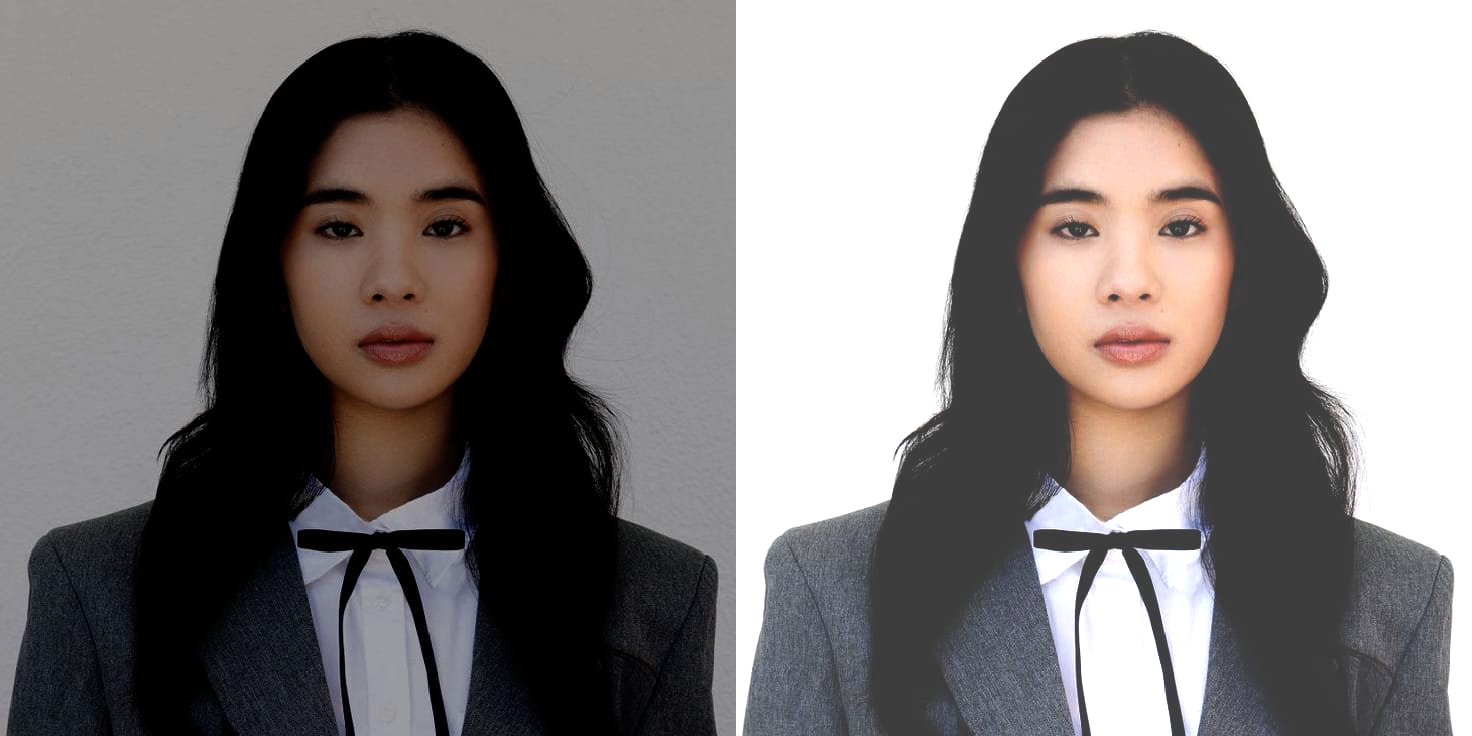

In [19]:
print("Mengubah kontras dan tingkat kecerahan citra")
print("--------------------------------------------")

# Input brightness [-255, 255] dan contrast [1.0 - 3.0]
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Baca gambar
original = cv.imread('/content/drive/MyDrive/Image PCVK/female.jpeg')

# Transformasi kontras & brightness
# g(x,y) = a * f(x,y) + b
# OpenCV punya fungsi bawaan
adjusted = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Menggabungkan sebelum & sesudah
final_frame = cv.hconcat([original, adjusted])
cv2_imshow(final_frame)

3. Implementasikan transformasi kecerahan logaritmik pada Google Colaboratory menggunakan
rumus yang tertulis dalam Tinjauan Latar Belakang Teoritis, menghasilkan keluaran yang ditunjukkan pada
gambar berikut:

Mengubah tingkat kecerahan citra dengan Transformasi log
-----------------------------------
Masukkan nilai kecerahan: 40


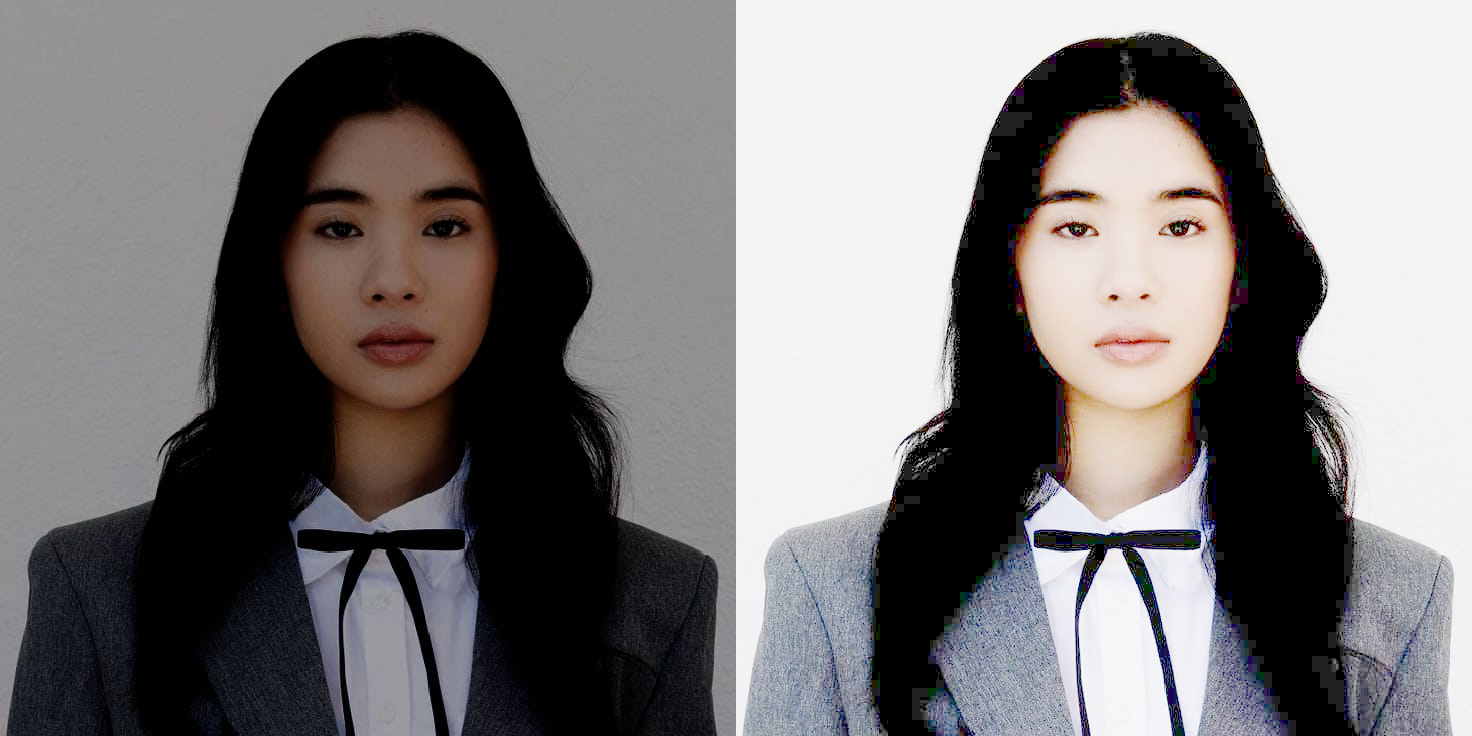

In [21]:
print("Mengubah tingkat kecerahan citra dengan Transformasi log")
print("-----------------------------------")

brightness = int(input("Masukkan nilai kecerahan: "))

# Baca citra
original = cv.imread('/content/drive/MyDrive/Image PCVK/female.jpeg')

# Konversi ke float agar tidak overflow
original_float = original.astype(np.float32)

# Hitung konstanta c
c = 255 / np.log(1 + np.max(original_float))

# Transformasi log
log_transformed = c * np.log(1 + original_float)

# Kembalikan ke tipe uint8 (0-255)
log_transformed = np.array(log_transformed, dtype=np.uint8)

# Menggabungkan hasil sebelum dan sesudah
final_frame = cv.hconcat([original, log_transformed])
cv2_imshow(final_frame)

4. Implementasikan transformasi skala abu-abu menggunakan metode rata-rata, kecerahan, dan luminansi
di Google Colaboratory menggunakan rumus yang tertulis dalam Tinjauan Latar Belakang Teoritis, menghasilkan keluaran sebagai berikut:

Grayscale Transformation dengan label Averaging, Lightness, Luminance
--------------------------------------------------------------------


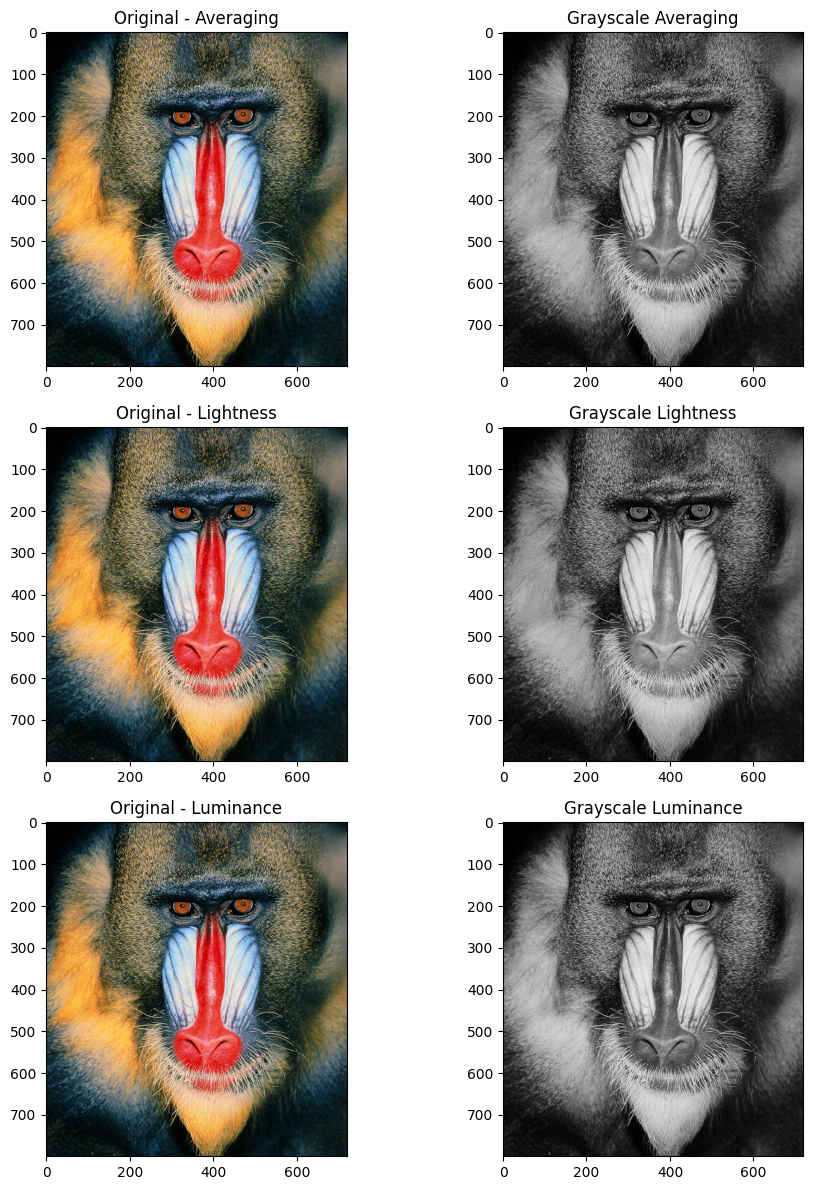

In [27]:
import matplotlib.pyplot as plt
print("Grayscale Transformation dengan label Averaging, Lightness, Luminance")
print("--------------------------------------------------------------------")

# Baca citra
original = cv.imread('/content/drive/MyDrive/Image PCVK/Mandrill.jpg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)  # konversi BGR ke RGB

# Konversi ke float
img_float = original.astype(np.float32)

# Memisahkan channel
R, G, B = img_float[:,:,0], img_float[:,:,1], img_float[:,:,2]

# 1. Averaging
gray_avg = ((R + G + B) / 3).astype(np.uint8)

# 2. Lightness
gray_lightness = ((np.maximum.reduce([R, G, B]) + np.minimum.reduce([R, G, B])) / 2).astype(np.uint8)

# 3. Luminance
gray_luminance = (0.21 * R + 0.72 * G + 0.07 * B).astype(np.uint8)

# Plot hasil
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Averaging
axs[0,0].imshow(original)
axs[0,0].set_title("Original - Averaging")
axs[0,1].imshow(gray_avg, cmap="gray")
axs[0,1].set_title("Grayscale Averaging")

# Lightness
axs[1,0].imshow(original)
axs[1,0].set_title("Original - Lightness")
axs[1,1].imshow(gray_lightness, cmap="gray")
axs[1,1].set_title("Grayscale Lightness")

# Luminance
axs[2,0].imshow(original)
axs[2,0].set_title("Original - Luminance")
axs[2,1].imshow(gray_luminance, cmap="gray")
axs[2,1].set_title("Grayscale Luminance")

plt.tight_layout()
plt.show()

5. Menampilkan warna tertentu pada gambar, dan mengubah warna lainnya menjadi skala abu-abu. Misalnya, menampilkan warna biru pada input gambar dan mengubah bagian lain yang tidak berwarna biru menjadi skala abu-abu seperti pada contoh di bawah ini:

Transformasi: tampilkan warna tertentu, lainnya jadi grayscale
-------------------------------------------------------------


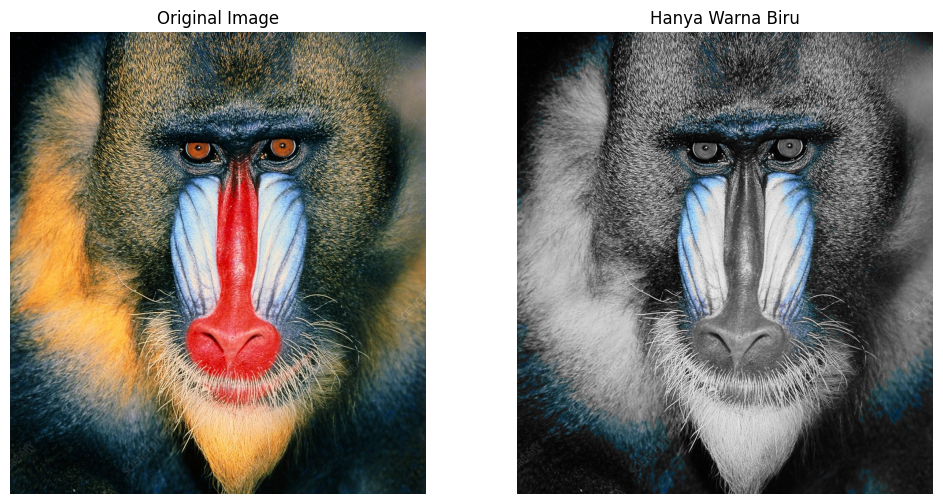

In [29]:
print("Transformasi: tampilkan warna tertentu, lainnya jadi grayscale")
print("-------------------------------------------------------------")

# Baca citra
original = cv.imread('/content/drive/MyDrive/Image PCVK/Mandrill.jpg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)  # konversi BGR → RGB

# Konversi ke HSV
hsv = cv.cvtColor(original, cv.COLOR_RGB2HSV)

# Pilih warna target: biru
lower_blue = np.array([90, 50, 50])    # batas bawah HSV untuk biru
upper_blue = np.array([130, 255, 255]) # batas atas HSV untuk biru

# Buat mask untuk warna biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# mengubah gambar ke grayscale
gray = cv.cvtColor(original, cv.COLOR_RGB2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

# menggabungkan: bagian biru tetap berwarna, lainnya grayscale
result = np.where(mask[:, :, np.newaxis] != 0, original, gray_bgr)

# menampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(original)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(result)
axs[1].set_title("Hanya Warna Biru")
axs[1].axis("off")

plt.show()